# Michigan COVID Dataset

Note on deaths (04/13/21): Regular reviews of death certificate data maintained in Vital Records reporting systems are conducted by MDHHS staff three times per week. As a part of this process, records that identify COVID-19 infection as a contributing factor to death are compared against all laboratory confirmed cases of COVID-19 in the Michigan Disease Surveillance System (MDSS). If a death certificate is matched to a confirmed COVID-19 case and that record in the MDSS does not indicate the individual died, the MDSS record is updated to indicate the death and the appropriate local health department is notified. These matched deaths are then included with mortality information posted to the Michigan Coronavirus website. As a result of the most recent assessment, today's data includes 37 additional deaths identified by this methodology.

The State of Michigan is working around the clock to test and treat COVID-19 patients. Below is the most recent data healthcare experts across the state have compiled. It is updated Monday - Saturday. 

https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html

# Import Libraries to read files

In [1]:
import pandas as pd
import seaborn as sns

# Read dataset

In [2]:
df_cases_death_by_county = pd.read_excel("//Users//kritikaversha//Downloads//Michigan_COVID_Dataset//Cases_and_Deaths_by_County_2021-04-13_722108_7.xlsx")
df_cases_death_by_symptom_onset = pd.read_excel("//Users//kritikaversha//Downloads//Michigan_COVID_Dataset//Cases_and_Deaths_by_County_and_by_Date_of_Symptom_Onset_or_by_Date_of_Death2021-04-13_722107_7.xlsx")
df_cases_by_statewide_demographic = pd.read_excel("//Users//kritikaversha//Downloads//Michigan_COVID_Dataset//Cases_by_Demographics_Statewide_2021-04-13_722106_7.xlsx")
df_covid19_test_by_county = pd.read_excel("//Users//kritikaversha//Downloads//Michigan_COVID_Dataset//Covid-19_Tests_by_County_2021-04-13_722104_7.xlsx")
df_diagnostic_result = pd.read_excel("//Users//kritikaversha//Downloads//Michigan_COVID_Dataset//Diagnostic_Tests_by_Result_and_County_2021-04-13_722101_7.xlsx")
df_michigan_population = pd.read_excel("//Users//kritikaversha//Downloads//Michigan_COVID_Dataset//Michigan_Population_By_County.xlsx")

In [3]:
df_michigan_population['County'] = df_michigan_population['County'].str.replace(' County','')
df_michigan_population = df_michigan_population.rename(columns={'County': 'COUNTY'})
df_michigan_population.drop(['Rank'], axis=1, inplace=True)
df_michigan_population.head()

,COUNTY,Population
0,Wayne,1757299
1,Oakland,1253185
2,Macomb,870325
3,Kent,648121
4,Genesee,407875


In [4]:
df_cases_death_by_county = pd.merge(df_cases_death_by_county,df_michigan_population, on='COUNTY', how='inner' )
df_cases_death_by_county

,COUNTY,CASE_STATUS,Cases,Deaths,Updated,Population
0,Alcona,Confirmed,482,21,2021-04-13 13:29:38.774,10353
1,Alcona,Probable,112,5,2021-04-13 13:29:38.774,10353
2,Alger,Confirmed,297,1,2021-04-13 13:29:38.774,9151
3,Alger,Probable,178,4,2021-04-13 13:29:38.774,9151
4,Allegan,Confirmed,8211,99,2021-04-13 13:29:38.775,116143
...,...,...,...,...,...,...
157,Washtenaw,Probable,2130,6,2021-04-13 13:29:38.822,367000
158,Wayne,Confirmed,86548,2207,2021-04-13 13:29:38.823,1757299
159,Wayne,Probable,7240,122,2021-04-13 13:29:38.824,1757299
160,Wexford,Confirmed,2173,28,2021-04-13 13:29:38.824,33256


In [5]:
df_cases_death_by_symptom_onset = df_cases_death_by_symptom_onset.pivot_table(index=['Date','COUNTY'], columns='CASE_STATUS', values=['Cases','Deaths','Cases.Cumulative','Deaths.Cumulative']).reset_index()
df_cases_death_by_symptom_onset.columns = df_cases_death_by_symptom_onset.columns.to_series().str.join('_')
df_cases_death_by_symptom_onset = df_cases_death_by_symptom_onset.rename(columns={'Date_': 'Date', 'COUNTY_':'COUNTY'})
df_cases_death_by_symptom_onset



,Date,COUNTY,Cases_Confirmed,Cases_Probable,Cases.Cumulative_Confirmed,Cases.Cumulative_Probable,Deaths_Confirmed,Deaths_Probable,Deaths.Cumulative_Confirmed,Deaths.Cumulative_Probable
0,2020-03-01,Alcona,0,0,0,0,0,0,0,0
1,2020-03-01,Alger,0,0,0,0,0,0,0,0
2,2020-03-01,Allegan,0,0,0,0,0,0,0,0
3,2020-03-01,Alpena,0,0,0,0,0,0,0,0
4,2020-03-01,Antrim,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35987,2021-04-13,Unknown,0,0,3,18,0,0,0,0
35988,2021-04-13,Van Buren,3,4,5697,399,0,0,93,12
35989,2021-04-13,Washtenaw,7,6,21230,2130,0,0,251,6
35990,2021-04-13,Wayne,23,16,86548,7240,0,1,2207,121


In [6]:
df_covid19_test_by_county = df_covid19_test_by_county[df_covid19_test_by_county.TestType == 'Total'].head()
df_covid19_test_by_county

,COUNTY,TestType,Count,RatePerMillion,Updated
2,Alcona,Total,6623,636521.0,2021-04-13 13:29:54.936
5,Alger,Total,8109,890316.0,2021-04-13 13:29:54.936
8,Allegan,Total,111587,945004.0,2021-04-13 13:29:54.936
11,Alpena,Total,19452,684809.0,2021-04-13 13:29:54.936
14,Antrim,Total,21437,919096.0,2021-04-13 13:29:54.936


In [7]:
df_diagnostic_result

,COUNTY,MessageDate,Negative,Positive,Total
0,Alcona,2020-03-17,1,0,1
1,Alcona,2020-03-20,2,0,2
2,Alcona,2020-03-23,1,0,1
3,Alcona,2020-03-24,1,0,1
4,Alcona,2020-03-25,2,0,2
...,...,...,...,...,...
33268,Wexford,2021-04-08,85,40,125
33269,Wexford,2021-04-09,85,31,116
33270,Wexford,2021-04-10,59,23,82
33271,Wexford,2021-04-11,62,7,69


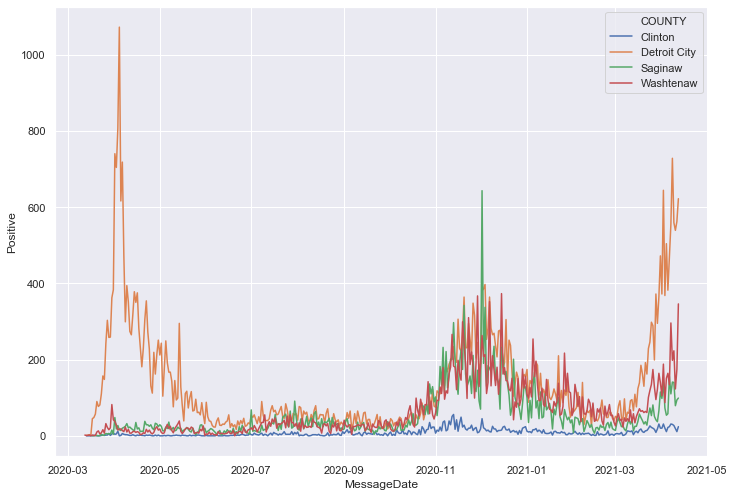

In [8]:
COUNTY_LIST = ['Washtenaw','Detroit City','Clinton','Saginaw']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_diagnostic_result[df_diagnostic_result.COUNTY.isin(COUNTY_LIST)], x="MessageDate", y="Positive", hue="COUNTY")

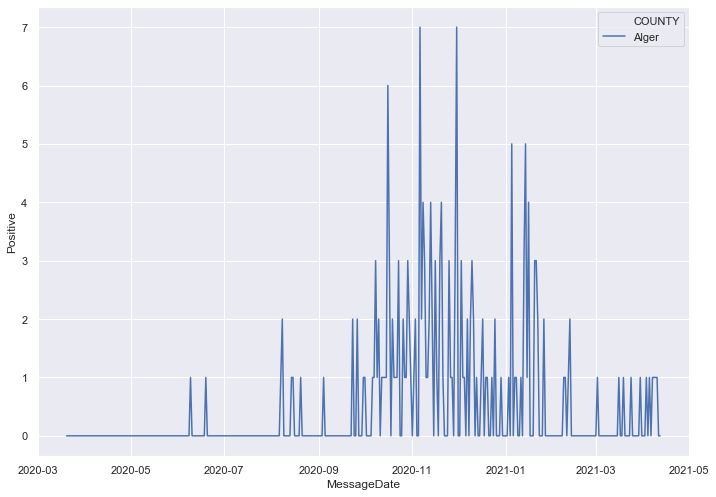

In [9]:
COUNTY_LIST = ['Alger']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_diagnostic_result[df_diagnostic_result.COUNTY.isin(COUNTY_LIST)], x="MessageDate", y="Positive", hue="COUNTY")

# Create a dataframe for Cases by County, Positive Test and Death

In [10]:
filtered_df = pd.merge(df_cases_death_by_symptom_onset, df_diagnostic_result, left_on=['COUNTY','Date'], right_on=['COUNTY','MessageDate'], how = 'inner')
filtered_df = pd.merge(filtered_df,df_michigan_population, on='COUNTY', how='inner' )
filtered_df = filtered_df[filtered_df.COUNTY == 'Alger']
filtered_df

,Date,COUNTY,Cases_Confirmed,Cases_Probable,Cases.Cumulative_Confirmed,Cases.Cumulative_Probable,Deaths_Confirmed,Deaths_Probable,Deaths.Cumulative_Confirmed,Deaths.Cumulative_Probable,MessageDate,Negative,Positive,Total,Population
27639,2020-03-20,Alger,0,0,0,0,0,0,0,0,2020-03-20,1,0,1,9151
27640,2020-03-25,Alger,0,0,0,0,0,0,0,0,2020-03-25,1,0,1,9151
27641,2020-03-26,Alger,0,0,0,0,0,0,0,0,2020-03-26,1,0,1,9151
27642,2020-03-27,Alger,0,0,0,0,0,0,0,0,2020-03-27,1,0,1,9151
27643,2020-03-30,Alger,0,0,0,0,0,0,0,0,2020-03-30,1,0,1,9151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999,2021-04-08,Alger,1,0,295,176,0,0,1,4,2021-04-08,6,1,7,9151
28000,2021-04-09,Alger,1,1,296,177,0,0,1,4,2021-04-09,38,1,39,9151
28001,2021-04-10,Alger,0,0,296,177,0,0,1,4,2021-04-10,6,1,7,9151
28002,2021-04-11,Alger,0,0,296,177,0,0,1,4,2021-04-11,15,0,15,9151


In [11]:
filtered_df.to_csv("//Users//kritikaversha//Desktop//Agent_Based_Modeling_MESA//covid_final.csv", index=False)